In [68]:
import logging
from pathlib import Path

import pandas as pd
import numpy as np

from copairs.map import run_pipeline, aggregate

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm.auto import tqdm

In [69]:
logging.basicConfig(format="%(levelname)s:%(asctime)s:%(name)s:%(message)s")
logging.getLogger("copairs").setLevel(logging.INFO)

In [70]:
# evalzoo_results = "5f53102a"
evalzoo_results = "d2311b58"

In [71]:
subset_corrected = pd.read_parquet(
    "../3.correct/output/subset_profiles_cc_corrected.parquet"
)
# subset_corrected.reset_index(inplace=True, drop=True)
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_Mito_5_00_256,Nuclei_Texture_InfoMeas1_Mito_5_02_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_DNA_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Nuclei_Texture_SumVariance_AGP_5_01_256,Cells_Count
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,...,-0.186120,0.224393,-0.674491,-1.546098,0.149433,-0.620143,1.537437,0.094296,0.558373,1.016925
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,...,-0.156428,-0.704158,-1.218763,-1.639803,0.437437,-1.007869,1.701927,1.100106,1.412527,1.577271
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,...,-0.354677,-0.406209,-0.446483,-0.972917,1.158370,0.448857,0.724587,0.056280,0.536979,-0.352811
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,...,-4.617327,-0.611122,-0.356669,-0.268779,1.725261,0.982674,-0.543496,1.773940,-1.640721,-0.290550
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,...,-0.330817,-0.469409,-0.455415,0.184663,1.380698,1.208246,-0.224822,0.470515,-0.018334,-0.477332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,0.460429,0.254158,0.109740,-0.550101,0.248344,-0.589628,0.710816,-0.191293,0.755142,0.208088
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.153905,1.002612,0.357619,0.250172,0.076972,1.129031,-0.120370,0.738204,0.343738,1.270052
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.290978,0.559867,0.534637,1.141291,-1.087403,0.860516,-1.058795,0.401875,-0.423379,1.076315
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.622801,-0.451397,0.923011,-0.613694,0.396223,-0.354869,0.294841,-1.495372,-0.966784,-1.191122


In [72]:
# adding dummy index spped up calculations by skipping positive pairs between controls

subset_corrected["Metadata_dummy_index"] = subset_corrected.index
subset_corrected.loc[
    subset_corrected["Metadata_pert_type"] == "trt", "Metadata_dummy_index"
] = -1
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_Mito_5_02_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_DNA_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Nuclei_Texture_SumVariance_AGP_5_01_256,Cells_Count,Metadata_dummy_index
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,...,0.224393,-0.674491,-1.546098,0.149433,-0.620143,1.537437,0.094296,0.558373,1.016925,-1
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,...,-0.704158,-1.218763,-1.639803,0.437437,-1.007869,1.701927,1.100106,1.412527,1.577271,-1
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,...,-0.406209,-0.446483,-0.972917,1.158370,0.448857,0.724587,0.056280,0.536979,-0.352811,-1
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,...,-0.611122,-0.356669,-0.268779,1.725261,0.982674,-0.543496,1.773940,-1.640721,-0.290550,-1
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,...,-0.469409,-0.455415,0.184663,1.380698,1.208246,-0.224822,0.470515,-0.018334,-0.477332,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,0.254158,0.109740,-0.550101,0.248344,-0.589628,0.710816,-0.191293,0.755142,0.208088,19138
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.002612,0.357619,0.250172,0.076972,1.129031,-0.120370,0.738204,0.343738,1.270052,19139
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.559867,0.534637,1.141291,-1.087403,0.860516,-1.058795,0.401875,-0.423379,1.076315,19140
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.451397,0.923011,-0.613694,0.396223,-0.354869,0.294841,-1.495372,-0.966784,-1.191122,19141


In [73]:
unique_trts = subset_corrected[subset_corrected.Metadata_pert_type == "trt"][
    "Metadata_JCP2022"
].unique()
unique_trts

array(['JCP2022_900008', 'JCP2022_900034', 'JCP2022_900327', ...,
       'JCP2022_915125', 'JCP2022_915126', 'JCP2022_915127'], dtype=object)

In [74]:
metadata = subset_corrected.filter(regex="^Metadata_")
feature_values = subset_corrected.filter(regex="^(?!Metadata_)").values

In [75]:
pos_sameby = ["Metadata_Well", "Metadata_dummy_index"]
pos_diffby = ["Metadata_JCP2022"]

neg_sameby = []
neg_diffby = ["Metadata_pert_type"]

null_size = 10000

In [76]:
result = run_pipeline(
    metadata,
    feature_values,
    pos_sameby,
    pos_diffby,
    neg_sameby,
    neg_diffby,
    null_size,
    batch_size=100000,
)

INFO:2023-06-30 16:18:07,847:copairs:Indexing metadata...
INFO:2023-06-30 16:18:07,873:copairs:Finding positive pairs...
INFO:2023-06-30 16:18:09,896:copairs:dropping dups...
INFO:2023-06-30 16:18:10,847:copairs:Finding negative pairs...
INFO:2023-06-30 16:18:31,134:copairs:dropping dups...
INFO:2023-06-30 16:19:15,733:copairs:Computing positive similarities...


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:2023-06-30 16:19:19,486:copairs:Computing negative similarities...


  0%|          | 0/161 [00:00<?, ?it/s]

INFO:2023-06-30 16:20:53,522:copairs:Building rank lists...
INFO:2023-06-30 16:21:13,804:copairs:Computing average precision...
INFO:2023-06-30 16:21:14,047:copairs:Computing null distributions...
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
INFO:2023-06-30 16:21:21,479:copairs:Computing P-values...
INFO:2023-06-30 16:21:21,682:copairs:Creating result DataFrame...
INFO:2023-06-30 16:21:21,697:copairs:F

In [77]:
result[0]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,2667.0,trt,source_4,BR00117037,K06,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.035796,0.084762
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,4596.0,trt,source_4,BR00117037,O03,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.000100,0.214483
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,4140.0,trt,source_4,BR00117037,F09,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.100290,0.070053
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,2451.0,trt,source_4,BR00117037,A19,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.000100,0.190360
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,2649.0,trt,source_4,BR00117037,G18,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.653035,0.049635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon,source_4,BR00126542,L04,OAB37.38.39.40.A,2021_08_09_Batch11,19138,0.000100,NaN
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,B15,OAB37.38.39.40.A,2021_08_09_Batch11,19139,0.000100,NaN
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,B20,OAB37.38.39.40.A,2021_08_09_Batch11,19140,0.000100,NaN
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,E12,OAB37.38.39.40.A,2021_08_09_Batch11,19141,0.000100,NaN


In [78]:
result[0][result[0].Metadata_JCP2022 == "JCP2022_900041"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
6670,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.734827,0.048173
8794,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.067393,0.074230
9148,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.739826,0.048057
9502,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.097890,0.070174
9856,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.942206,0.042356
10921,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.771223,0.047393
11281,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.994201,0.038700
12703,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.874513,0.044642
13062,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.000100,0.158759
13422,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.168183,0.064629


In [79]:
result[1]

,0,1,ix1,ix2,dist
0,A01,-1,17792,1795,0.003237
1,A01,-1,17792,4356,0.005496
2,A01,-1,17792,12421,0.529921
3,A01,-1,17792,5900,0.527762
4,A01,-1,17792,16013,0.511258
...,...,...,...,...,...
411785,P16,-1,11379,8822,-0.029289
411786,P16,-1,11379,8054,-0.005151
411787,P16,-1,8054,15230,-0.005701
411788,P16,-1,8054,8822,0.163890


In [80]:
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values()

Series([], Name: dist, dtype: float64)

In [81]:
collatedsim = pd.read_parquet(
    f"../2.evalzoo/results/{evalzoo_results}/collatedsim.parquet"
)
collatedsim_jcp41 = collatedsim[collatedsim.Metadata_JCP2022 == "JCP2022_900041"]

# note sampling every other row to get rid of duplicates
cs_sim_jcp41 = (
    collatedsim_jcp41[collatedsim_jcp41.type == "rep"]["sim"]
    .sort_values()[::2]
    .reset_index(drop=True)
)

In [82]:
collatedsim_jcp41[
    (collatedsim_jcp41.Metadata_Well == "F08") & (collatedsim_jcp41.type == "rep")
]

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type,sim
280760,7251,970,JCP2022_900041,F08,pert,rep,0.009618
280766,9275,970,JCP2022_900041,F08,pert,rep,0.081475
280767,9609,970,JCP2022_900041,F08,pert,rep,0.005850
280768,9943,970,JCP2022_900041,F08,pert,rep,0.053733
280769,10277,970,JCP2022_900041,F08,pert,rep,0.006308
...,...,...,...,...,...,...,...
282970,7251,18847,JCP2022_900041,F08,pert,rep,-0.001344
282976,9275,18847,JCP2022_900041,F08,pert,rep,-0.043668
282977,9609,18847,JCP2022_900041,F08,pert,rep,-0.000351
282978,9943,18847,JCP2022_900041,F08,pert,rep,-0.039609


In [83]:
profiles = pd.read_parquet(f"../2.evalzoo/results/{evalzoo_results}/profiles.parquet")
profiles = profiles.filter(regex="^(Metadata_)")
profiles

,Metadata_pert_type,Metadata_reference_or_other,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy
0,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,G13,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
1,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,G14,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
2,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,H13,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
3,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,H14,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
4,negcon,reference,JCP2022_915129,ccsbBroad304_99988,ORFC00002.1_TRC304.1,pLX_304,HcRed.1,HcRed,HcRed,CONTROL,None,NaN,824.0,source_4,BR00117037,E11,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,trt,pert,JCP2022_915106,ccsbBroad304_16151,ORF015124.1_TRC304.1,pLX_304,NM_173660.5,DOK7,285489,9606,docking protein 7,99.8,1512.0,source_4,BR00126542,G14,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19139,trt,pert,JCP2022_915108,ccsbBroad304_16153,ORF011544.1_TRC304.1,pLX_304,NM_152616.5,TRIM42,287015,9606,tripartite motif containing 42,99.5,2169.0,source_4,BR00126542,B07,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19140,trt,pert,JCP2022_915125,ccsbBroad304_16170,ORF004157.1_TRC304.1,pLX_304,NM_001368080.1,GOLGA8G,283768,9606,golgin A8 family member G,98.3,1290.0,source_4,BR00126542,H23,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19141,trt,pert,JCP2022_915126,ccsbBroad304_16171,ORF015612.1_TRC304.1,pLX_304,NM_001167670.3,TMEM239,100288797,9606,transmembrane protein 239,99.3,453.0,source_4,BR00126542,B04,OAB37.38.39.40.A,2021_08_09_Batch11,0.0


<Axes: >

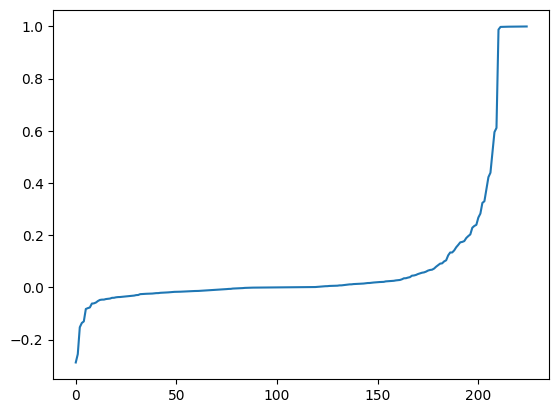

In [84]:
# collatedsim[collatedsim.type=="rep"]["sim"].sort_values().reset_index(drop=True)[::2].plot()
cs_sim_jcp41.plot()
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values().reset_index(
    drop=True
).plot()

In [85]:
# select rows from result[2] where either ix1 or ix2 is in index of result[0][result[0].Metadata_JCP2022=="JCP2022_900041"]

coparis_jcp41_rep_idx = result[0][result[0].Metadata_JCP2022 == "JCP2022_900041"].index
coparis_jcp41_ref_sim = result[2][
    result[2].ix1.isin(coparis_jcp41_rep_idx)
    | result[2].ix2.isin(coparis_jcp41_rep_idx)
]
coparis_jcp41_ref_sim

,ix1,ix2,dist
119,2289,10921,0.255351
4098,13417,10921,0.034392
4354,11271,9502,-0.052064
5599,2557,13422,0.999257
11154,15906,6670,-0.026427
...,...,...,...
16064556,11272,8794,-0.142788
16065589,15911,8794,-0.043743
16065990,8428,11281,0.013782
16069563,5235,6670,-0.010371


In [86]:
rep_sim = (
    collatedsim_jcp41[collatedsim_jcp41.type == "rep"]
    .sort_values("sim")
    .reset_index(drop=True)
)
rep_sim.groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.287535,1,1,1,1,1,1
-0.270174,1,1,1,1,1,1
-0.255551,1,1,1,1,1,1
-0.234449,1,1,1,1,1,1
-0.152674,1,1,1,1,1,1
...,...,...,...,...,...,...
0.999724,1,1,1,1,1,1
0.999746,1,1,1,1,1,1
0.999750,1,1,1,1,1,1


In [87]:
rep_sim[::2].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.287535,1,1,1,1,1,1
-0.255551,1,1,1,1,1,1
-0.152674,1,1,1,1,1,1
-0.136324,1,1,1,1,1,1
-0.130094,1,1,1,1,1,1
...,...,...,...,...,...,...
0.999393,1,1,1,1,1,1
0.999429,1,1,1,1,1,1
0.999714,1,1,1,1,1,1


In [88]:
rep_sim_copair = rep_sim[::2].loc[:, ["id1", "id2", "sim"]]
rep_sim_copair.columns = ["ix1", "ix2", "dist"]
rep_sim_copair

,ix1,ix2,dist
0,12992,7193,-0.287535
2,12992,18277,-0.255551
4,13335,7193,-0.152674
6,12992,9116,-0.136324
8,12992,17936,-0.130094
...,...,...,...
440,10277,1307,0.999393
442,10277,15798,0.999429
444,9609,1307,0.999714
446,7251,18506,0.999746


In [89]:
collatedsim_jcp41[collatedsim_jcp41.type == "ref"].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type
sim,,,,,,
-0.484082,1,1,1,1,1,1
-0.427326,1,1,1,1,1,1
-0.424173,1,1,1,1,1,1
-0.394444,1,1,1,1,1,1
-0.372776,1,1,1,1,1,1
...,...,...,...,...,...,...
0.999811,1,1,1,1,1,1
0.999813,1,1,1,1,1,1
0.999830,1,1,1,1,1,1


In [90]:
ref_sim = (
    collatedsim_jcp41[collatedsim_jcp41.type == "ref"]
    .sort_values("sim")
    .reset_index(drop=True)
)
ref_sim

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_reference_or_other,type,sim
0,12992,523,JCP2022_900041,H13,pert,ref,-0.484082
1,13335,755,JCP2022_900041,H13,pert,ref,-0.427326
2,12992,92,JCP2022_900041,H13,pert,ref,-0.424173
3,13335,382,JCP2022_900041,H13,pert,ref,-0.394444
4,12992,195,JCP2022_900041,H13,pert,ref,-0.372776
...,...,...,...,...,...,...,...
8795,9609,831,JCP2022_900041,F08,pert,ref,0.999811
8796,7251,33,JCP2022_900041,F08,pert,ref,0.999813
8797,7251,832,JCP2022_900041,F08,pert,ref,0.999830
8798,9609,424,JCP2022_900041,F08,pert,ref,0.999833


In [91]:
ref_sim_2_copair = ref_sim.loc[:, ["id1", "id2", "sim"]]
ref_sim_2_copair.columns = ["ix1", "ix2", "dist"]
ref_sim_2_copair

,ix1,ix2,dist
0,12992,523,-0.484082
1,13335,755,-0.427326
2,12992,92,-0.424173
3,13335,382,-0.394444
4,12992,195,-0.372776
...,...,...,...
8795,9609,831,0.999811
8796,7251,33,0.999813
8797,7251,832,0.999830
8798,9609,424,0.999833


<Axes: >

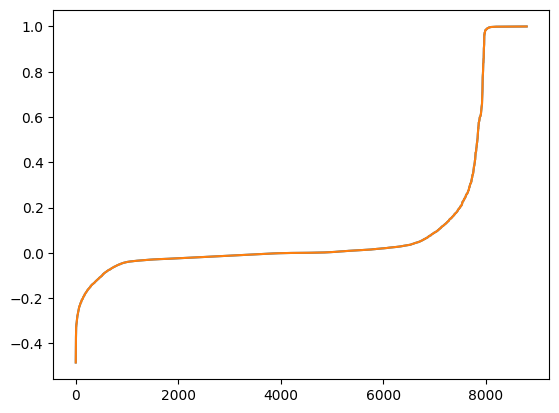

In [92]:
coparis_jcp41_ref_sim.dist.sort_values().reset_index(drop=True).plot()
ref_sim_2_copair.dist.sort_values().reset_index(drop=True).plot()

In [93]:
# check that coparis_jcp41_ref_sim.dist and ref_sim_2_copair.dist have same values

np.allclose(
    coparis_jcp41_ref_sim.dist.sort_values().reset_index(drop=True),
    ref_sim_2_copair.dist.sort_values().reset_index(drop=True),
)

True

In [94]:
from copairs.compute_np import compute_ap
from copairs.map import build_rank_lists

In [95]:
rank_lists = build_rank_lists(rep_sim_copair, ref_sim_2_copair)
rank_lists

ix
1        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
2        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
3        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
4        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
5        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
                       ...               
18165                      [[1, 1, 1, 1]]
18277                            [[1, 1]]
18506                         [[1, 1, 1]]
18847                            [[1, 1]]
18959                               [[1]]
Name: label, Length: 978, dtype: object

In [96]:
ap_scores = rank_lists.apply(compute_ap)
ap_scores = np.concatenate(ap_scores.values)
ap_scores

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [97]:
np.nanmean(ap_scores)

0.9019061023738639

In [98]:
result[0][result[0].Metadata_JCP2022 == "JCP2022_900041"].average_precision.mean()

0.06371124191629142

In [99]:
collatedsim_jcp41.sort_values("sim", ascending=True).reset_index(drop=True)["sim"]
# add a line for the threshold at 0 on y axis
# plt.axhline(y=0, color='r', linestyle='--')

0      -0.484082
1      -0.427326
2      -0.424173
3      -0.394444
4      -0.372776
          ...   
9245    0.999811
9246    0.999813
9247    0.999830
9248    0.999833
9249    0.999834
Name: sim, Length: 9250, dtype: float64

In [100]:
agg_result = aggregate(result[0], sameby="Metadata_JCP2022", threshold=0.05)
agg_result

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,JCP2022_900006,0.115591,2.775249,0.016806,1.774534,True,True
1,JCP2022_900008,0.108876,2.511203,0.018924,1.722984,True,True
2,JCP2022_900012,0.074444,1.262388,0.093720,1.028167,False,False
3,JCP2022_900014,0.086115,1.641204,0.052342,1.281152,True,False
4,JCP2022_900015,0.143320,2.607851,0.017848,1.748410,True,True
...,...,...,...,...,...,...,...
3615,JCP2022_915127,0.057209,0.478737,0.353168,0.452018,False,False
3616,JCP2022_915128,NaN,4.000043,0.013539,1.868409,True,True
3617,JCP2022_915129,NaN,4.000043,0.013539,1.868409,True,True
3618,JCP2022_915130,NaN,4.000043,0.013539,1.868409,True,True


In [101]:
agg_result_trt = agg_result[
    (~agg_result.average_precision.isnull())
    & (agg_result.Metadata_JCP2022.isin(unique_trts))
]
agg_result_trt

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,JCP2022_900006,0.115591,2.775249,0.016806,1.774534,True,True
1,JCP2022_900008,0.108876,2.511203,0.018924,1.722984,True,True
2,JCP2022_900012,0.074444,1.262388,0.093720,1.028167,False,False
3,JCP2022_900014,0.086115,1.641204,0.052342,1.281152,True,False
4,JCP2022_900015,0.143320,2.607851,0.017848,1.748410,True,True
...,...,...,...,...,...,...,...
3611,JCP2022_915120,0.076150,1.315719,0.086630,1.062333,True,False
3612,JCP2022_915123,0.079047,1.597087,0.056334,1.249231,True,False
3613,JCP2022_915125,0.136828,3.650406,0.013539,1.868409,True,True
3614,JCP2022_915126,0.071561,1.457212,0.069449,1.158336,True,False


In [102]:
p_value = agg_result_trt["above_p_threshold"]
print(
    f"mmAP: {agg_result_trt.average_precision.mean():.03}",
    f"p<0.05: {p_value.mean():.03} ({p_value.sum()}/{p_value.shape[0]})",
)

mmAP: 0.0926 p<0.05: 0.565 (2042/3616)


<Axes: xlabel='average_precision', ylabel='nlog10pvalue'>

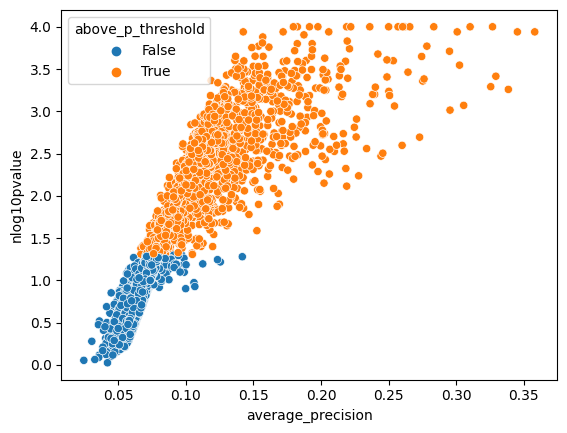

In [103]:
sns.scatterplot(
    data=agg_result_trt,
    x="average_precision",
    y="nlog10pvalue",
    hue="above_p_threshold",
)
# sns.kdeplot(data=subset_df, x=x_col, hue=hue_col, ax=ax_kde, legend=False)

In [104]:
# evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/d2311b58/metrics_level_1_ref.parquet")
evalzoo_l1 = pd.read_parquet(
    f"../2.evalzoo/results/{evalzoo_results}/metrics_level_1_ref.parquet"
)
evalzoo_l1.drop_duplicates(subset="Metadata_JCP2022", inplace=True)
evalzoo_l1

,Metadata_Well,Metadata_reference_or_other,Metadata_JCP2022,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,sim_ranked_relrank_median_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,A01,pert,JCP2022_908066,0.654671,0.386274,0.226277,0.066625,0.354450,0.304747,0.324682,...,45.0,880.0,880.0,0.173458,0.133772,0.195111,0.155556,2.349879,3.479347,1.441001
1,A01,pert,JCP2022_901499,0.654671,0.386274,0.226277,0.066625,0.354450,0.304747,0.324682,...,45.0,880.0,880.0,0.173458,0.133772,0.195111,0.155556,2.349879,3.479347,1.441001
2,A01,pert,JCP2022_907324,0.654671,0.386274,0.226277,0.066625,0.354450,0.304747,0.324682,...,45.0,880.0,880.0,0.173458,0.133772,0.195111,0.155556,2.349879,3.479347,1.441001
3,A01,pert,JCP2022_912710,0.654671,0.386274,0.226277,0.066625,0.354450,0.304747,0.324682,...,45.0,880.0,880.0,0.173458,0.133772,0.195111,0.155556,2.349879,3.479347,1.441001
4,A01,pert,JCP2022_908212,0.654671,0.386274,0.226277,0.066625,0.354450,0.304747,0.324682,...,45.0,880.0,880.0,0.173458,0.133772,0.195111,0.155556,2.349879,3.479347,1.441001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,P16,pert,JCP2022_914539,0.584217,0.659531,0.140131,0.203234,0.325846,0.299823,0.279818,...,45.0,880.0,880.0,0.132961,0.118247,0.141778,0.133333,2.397429,3.071377,1.441001
3649,P16,pert,JCP2022_903499,0.584217,0.659531,0.140131,0.203234,0.325846,0.299823,0.279818,...,45.0,880.0,880.0,0.132961,0.118247,0.141778,0.133333,2.397429,3.071377,1.441001
3650,P16,pert,JCP2022_901558,0.584217,0.659531,0.140131,0.203234,0.325846,0.299823,0.279818,...,45.0,880.0,880.0,0.132961,0.118247,0.141778,0.133333,2.397429,3.071377,1.441001
3651,P16,pert,JCP2022_908199,0.584217,0.659531,0.140131,0.203234,0.325846,0.299823,0.279818,...,45.0,880.0,880.0,0.132961,0.118247,0.141778,0.133333,2.397429,3.071377,1.441001


In [105]:
jcp_diff = list(
    set(agg_result_trt.Metadata_JCP2022.unique()).symmetric_difference(
        set(evalzoo_l1.Metadata_JCP2022.unique())
    )
)
jcp_diff

[]

In [106]:
# merge agg_result_trt and evalzoo_l1

merged = pd.merge(agg_result_trt, evalzoo_l1, on="Metadata_JCP2022", how="inner")
merged

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,Metadata_Well,Metadata_reference_or_other,sim_scaled_mean_ref_i_mean_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900006,0.115591,2.775249,0.016806,1.774534,True,True,B21,pert,0.372466,...,50.0,880.0,880.0,0.097817,0.089304,0.117455,0.120000,1.905230,1.712242,1.349484
1,JCP2022_900008,0.108876,2.511203,0.018924,1.722984,True,True,K06,pert,0.204200,...,50.0,880.0,880.0,0.083523,0.074331,0.079273,0.080000,1.374383,1.001348,1.084327
2,JCP2022_900012,0.074444,1.262388,0.093720,1.028167,False,False,C11,pert,0.168654,...,45.0,880.0,880.0,0.072272,0.061086,0.077333,0.066667,0.962123,0.437002,0.827446
3,JCP2022_900014,0.086115,1.641204,0.052342,1.281152,True,False,G21,pert,0.488740,...,45.0,880.0,880.0,0.113127,0.100972,0.131556,0.088889,2.192515,2.241182,1.437512
4,JCP2022_900015,0.143320,2.607851,0.017848,1.748410,True,True,P09,pert,0.327175,...,50.0,880.0,880.0,0.105629,0.089200,0.098182,0.080000,1.953888,1.707787,1.356910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,JCP2022_915120,0.076150,1.315719,0.086630,1.062333,True,False,D20,pert,0.270433,...,45.0,880.0,880.0,0.087432,0.079301,0.093333,0.088889,1.541133,1.231947,1.163175
3612,JCP2022_915123,0.079047,1.597087,0.056334,1.249231,True,False,B16,pert,0.250761,...,40.0,880.0,880.0,0.069584,0.062910,0.082222,0.075000,0.861295,0.511916,0.767730
3613,JCP2022_915125,0.136828,3.650406,0.013539,1.868409,True,True,H23,pert,0.548248,...,50.0,880.0,880.0,0.138955,0.122989,0.154909,0.120000,2.448375,3.154945,1.441001
3614,JCP2022_915126,0.071561,1.457212,0.069449,1.158336,True,False,B04,pert,0.248356,...,35.0,880.0,880.0,0.059796,0.058962,0.049286,0.057143,0.538110,0.345667,0.508215


<Axes: xlabel='sim_retrieval_average_precision_ref_i_mean_i', ylabel='average_precision'>

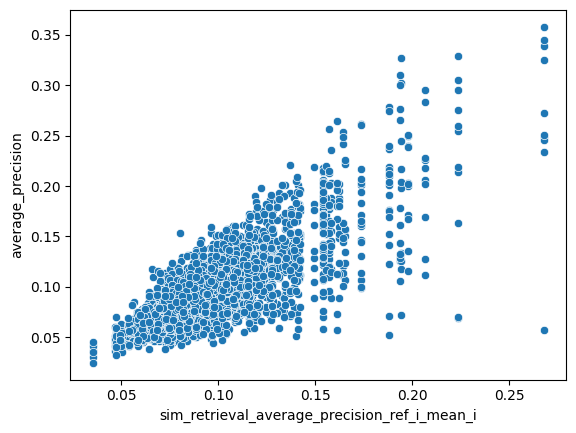

In [107]:
# plot sim_retrieval_average_precision_ref_i_mean_i vs average_precision
sns.scatterplot(
    data=merged, x="sim_retrieval_average_precision_ref_i_mean_i", y="average_precision"
)

In [108]:
l_0_1 = pd.read_parquet(
    f"../2.evalzoo/results/{evalzoo_results}/metrics_level_1_0_ref.parquet"
)
l_0_1[
    l_0_1.Metadata_JCP2022 == "JCP2022_900041"
].sim_retrieval_average_precision_ref_i.sort_values().to_list()

[0.0387004719671893,
 0.04235550839182723,
 0.04464196947613999,
 0.04739250069327783,
 0.04805662672462138,
 0.048172865753735486,
 0.06462946381908441,
 0.07017397915545077,
 0.07422958100748402,
 0.15875945217410373]

In [109]:
sorted(ap_scores[~np.isnan(ap_scores)])

[0.021462569422015687,
 0.023878672338631536,
 0.024247383863073017,
 0.025581208433047578,
 0.02713488594724976,
 0.02941247677983292,
 0.031054118759587496,
 0.036036147303049736,
 0.04189033312784151,
 0.1261002366643374,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

#### check specific replicate

In [43]:
copairs_rep_id = 8794
result[0].loc[copairs_rep_id, "average_precision"]

0.013452050737109015

In [44]:
copairs_rep_sim = result[1][
    (result[1].ix1 == copairs_rep_id) | (result[1].ix2 == copairs_rep_id)
].dist.sort_values()
copairs_rep_sim

16   -0.021925
19    0.029475
9     0.063526
5     0.084091
22    0.136681
Name: dist, dtype: float64

In [45]:
copairs_ref_sim = result[2][
    (result[2].ix1 == copairs_rep_id) | (result[2].ix2 == copairs_rep_id)
].dist.sort_values()
copairs_ref_sim

9957443    -0.287505
14996697   -0.275815
5437810    -0.273026
2774121    -0.260080
10054110   -0.254270
              ...   
12132628    0.359315
11677571    0.394089
9988242     0.471311
9525747     0.580794
7255957     0.620313
Name: dist, Length: 880, dtype: float64

In [46]:
profiles[
    (profiles.Metadata_JCP2022 == "JCP2022_900041") & (profiles.Metadata_Well == "F08")
]

,Metadata_pert_type,Metadata_reference_or_other,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy
7250,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00123945,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9274,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124766,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9608,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124767,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9942,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124768,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
10276,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124769,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0


In [47]:
evalzoo_rep_id = (
    profiles[
        (profiles.Metadata_JCP2022 == "JCP2022_900041")
        & (profiles.Metadata_Well == "F08")
        & (profiles.Metadata_Plate == "BR00124766")
    ].index[0]
    + 1
)
evalzoo_rep_id

9275

In [48]:
evalzoo_rep_sim = rep_sim_copair[
    (rep_sim_copair.ix1 == evalzoo_rep_id) | (rep_sim_copair.ix2 == evalzoo_rep_id)
].dist.sort_values()
evalzoo_rep_sim

8    -0.021925
34    0.029475
36    0.063526
38    0.084091
42    0.136681
Name: dist, dtype: float64

In [49]:
evalzoo_ref_sim = ref_sim_2_copair[
    (ref_sim_2_copair.ix1 == evalzoo_rep_id) | (ref_sim_2_copair.ix2 == evalzoo_rep_id)
].dist.sort_values()
evalzoo_ref_sim

27     -0.287505
34     -0.275815
36     -0.273026
47     -0.260080
54     -0.254270
          ...   
7758    0.359315
7783    0.394089
7823    0.471311
7872    0.580794
7908    0.620313
Name: dist, Length: 880, dtype: float64

In [50]:
np.allclose(copairs_rep_sim, evalzoo_rep_sim)

True

In [51]:
np.allclose(copairs_ref_sim, evalzoo_ref_sim)

True

In [52]:
# stack copairs rep_sim and ref_sim
copairs_sim = pd.concat([copairs_rep_sim, copairs_ref_sim], axis=0, ignore_index=True)
copairs_sim

0     -0.021925
1      0.029475
2      0.063526
3      0.084091
4      0.136681
         ...   
880    0.359315
881    0.394089
882    0.471311
883    0.580794
884    0.620313
Name: dist, Length: 885, dtype: float64

In [53]:
bin_rank = (copairs_sim.argsort()[::-1] < 5).astype(int)
bin_rank

884    0
883    0
882    0
881    0
880    0
      ..
4      0
3      0
2      0
1      0
0      0
Name: dist, Length: 885, dtype: int64

In [54]:
copairs_sim.argsort()

0        5
1        6
2        7
3        8
4        9
      ... 
880    880
881    881
882    882
883    883
884    884
Name: dist, Length: 885, dtype: int64

In [55]:
pos_indices = np.asarray(bin_rank[bin_rank == 1].index.to_list()) + 1
pos_indices

array([800, 736, 712, 620, 387])

In [56]:
(np.arange(1, 6) / pos_indices[::-1])

array([0.00258398, 0.00322581, 0.00421348, 0.00543478, 0.00625   ])

In [57]:
pos_indices[::-1]

array([387, 620, 712, 736, 800])

In [58]:
from sklearn.metrics import average_precision_score
from copairs.compute_np import compute_ap

In [59]:
y_true = np.zeros(len(copairs_sim), dtype=int)
y_true[:5] = 1

In [60]:
assert len(y_true) == len(bin_rank)

In [61]:
assert y_true.sum() == bin_rank.sum()

In [62]:
average_precision_score(y_true, copairs_sim)

0.013452050737109013

In [63]:
compute_ap(bin_rank[None, :])

/var/folders/41/1jdfcmfs0gx7qwx9d31rtxgr0000gq/T/ipykernel_12854/2771266867.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  compute_ap(bin_rank[None, :])


array([0.01345205])

In [64]:
l_0_1_jcp41 = l_0_1.loc[
    (l_0_1.Metadata_JCP2022 == "JCP2022_900041") & (l_0_1.Metadata_Well == "F08")
]
l_0_1_jcp41

,id1,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,Metadata_Plate,sim_scaled_mean_ref_i,sim_scaled_median_ref_i,sim_ranked_relrank_mean_ref_i,sim_ranked_relrank_median_ref_i,sim_mean_i,sim_median_i,sim_mean_stat_ref_i,sim_sd_stat_ref_i,sim_stat_signal_n_ref_i,sim_stat_background_n_ref_i,sim_retrieval_average_precision_ref_i,sim_retrieval_r_precision_ref_i,sim_retrieval_average_precision_ref_i_nlog10pvalue
95,7251,JCP2022_900041,pert,F08,BR00123945,-0.112550,-0.561650,0.533182,0.394318,0.193160,0.001527,0.241186,0.426704,5,880,0.006869,0.0,0.213221
147,9275,JCP2022_900041,pert,F08,BR00124766,0.512399,0.562948,0.264773,0.195455,0.058370,0.063526,0.006101,0.102007,5,880,0.013452,0.0,0.697929
184,9609,JCP2022_900041,pert,F08,BR00124767,-0.109574,-0.562652,0.525909,0.419318,0.194151,0.000743,0.240925,0.426875,5,880,0.006809,0.0,0.207232
221,9943,JCP2022_900041,pert,F08,BR00124768,-0.312356,-0.261745,0.517727,0.447727,0.003493,0.013397,0.064618,0.195691,5,880,0.006360,0.0,0.163909
258,10277,JCP2022_900041,pert,F08,BR00124769,-0.114030,-0.565558,0.537045,0.447727,0.193375,0.000957,0.241968,0.426148,5,880,0.006843,0.0,0.210392


In [67]:
print(qwewrt)

NameError: name 'qwewrt' is not defined

In [66]:
results_dir = Path("../2.evalzoo/results/")

for subdir in tqdm(results_dir.iterdir()):
    collatedsim_path = subdir / "collatedsim.parquet"
    l_0_1_path = subdir / "metrics_level_1_0_ref.parquet"

    if collatedsim_path.exists() and l_0_1_path.exists():
        subdir_collatedsim = pd.read_parquet(collatedsim_path)
        subdir_l_1_0 = pd.read_parquet(l_0_1_path)

        # Create groupby objects for both DataFrames
        group_col = subdir_l_1_0.columns[1]
        collatedsim_groups = subdir_collatedsim.groupby(group_col)["id1"].unique()
        l_1_0_groups = subdir_l_1_0.groupby(group_col)["id1"].unique()

        # Find groups (values of Metadata_JCP2022) that exist in both DataFrames
        common_groups = set(collatedsim_groups.index).intersection(
            set(l_1_0_groups.index)
        )

        # Compare the unique id1 values for each common group
        mismatch = any(
            set(collatedsim_groups[jcp]) != set(l_1_0_groups[jcp])
            for jcp in common_groups
        )

        # Check if there was a mismatch
        if mismatch:
            print(f"{subdir.name} id1 mismatch")
        else:
            print(f"{subdir.name} id1 match OK")

0it [00:00, ?it/s]

630757cf id1 match OK
66fd2a4d id1 match OK
f86c9fcc id1 match OK
ac65bc4b id1 match OK
d7ae7409 id1 match OK
273d3138 id1 match OK
263a5ff4 id1 match OK
2bde8689 id1 match OK
f5c36cb4 id1 match OK
30f99c08 id1 match OK
125bfb5b id1 match OK
8a46f718 id1 match OK
3d645cb2 id1 match OK
d2311b58 id1 mismatch
d4df76cd id1 mismatch
a534201d id1 match OK
26efacc8 id1 match OK
5ee8aabb id1 mismatch
64aa0540 id1 match OK
faa6ba3e id1 mismatch
49abf604 id1 match OK
790b8557 id1 match OK
50eec5d3 id1 match OK
fefae721 id1 match OK
cdaf16db id1 match OK
ef524325 id1 match OK
b2e52a3a id1 match OK
82ad004e id1 mismatch
df66eaf7 id1 match OK
b3ded838 id1 mismatch
703b13da id1 match OK
5a048fe4 id1 mismatch
0e4cd68f id1 mismatch
bcf32878 id1 match OK
61da8ae0 id1 mismatch
b8ad0e58 id1 mismatch
21b92180 id1 match OK
d66f1bce id1 mismatch
0485b96b id1 mismatch
ceb5f02a id1 match OK
cd1b92de id1 match OK
fd50b01b id1 match OK
63526422 id1 mismatch
5eaae264 id1 mismatch
e2bf955d id1 mismatch
758dee96 i

In [ ]:
subset_corrected_jcp41 = pd.read_parquet(
    "../3.correct/output/subset_profiles_cc_corrected_jcp41.parquet"
)

In [ ]:
subset_corrected_jcp41

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.264029,-0.392771,-0.075521,-0.318160,-0.108126,-0.182597,-0.372494,0.841880,0.569119,0.588377
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.197419,0.392460,1.132018,0.677997,0.313055,0.032181,-0.375780,-0.481387,-0.311138,0.125415
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.248412,-0.646200,-0.157074,-0.640999,-1.525043,-2.063936,-0.355328,0.745128,0.764497,2.570967
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.769421,0.540949,0.817828,0.573387,0.389490,0.285072,0.281767,-0.161707,-0.215592,0.082883
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,1.322121,1.647830,0.370312,1.140719,0.442288,-0.120973,-0.013233,-0.816204,-0.304201,0.635618
12473,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.125656,1.047042,-0.723194,0.304525,1.028024,-0.337078,-1.094263,0.062312,0.747945,1.438993
12827,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.570571,0.439327,-1.698030,0.646522,0.376449,-0.423062,-0.735259,-0.079811,0.390810,1.106705
13181,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.727780,0.064443,-1.789544,-0.196305,0.640013,-0.388927,-1.080657,0.559638,0.691678,1.230386
13535,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.347779,0.571679,-1.330065,0.075959,0.452837,-0.759007,-0.874188,0.284166,0.645475,1.296695
13889,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.861450,1.751276,-0.905727,0.180712,1.258550,0.217802,-1.341209,-0.545738,0.840374,1.259403
